In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [3]:
df = pd.read_csv("C:/Users/SURENDHAN/Downloads/movie/IMDb.csv", encoding='latin1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
for i in df.columns:
    if (df[i].dtype)=='object':
        df[i].replace(r'^/s*$',pd.NA,regex=True)
    print(i,df[i].isnull().sum())

Name 0
Year 528
Duration 8269
Genre 1877
Rating 7590
Votes 7589
Director 525
Actor 1 1617
Actor 2 2384
Actor 3 3144


In [5]:
df['Rating']=df['Rating'].fillna(0).astype('int64')
df.dtypes

Name        object
Year        object
Duration    object
Genre       object
Rating       int64
Votes       object
Director    object
Actor 1     object
Actor 2     object
Actor 3     object
dtype: object

In [6]:
len(df['Genre'].value_counts().index)

485

In [7]:
ty=' min'
df['Duration']=df['Duration'].str.replace(f'{ty}$','',regex=True)

In [8]:
df['Duration'].fillna(0, inplace=True)
df['Duration'] = df['Duration'].astype('int64')
t = df.groupby('Genre')['Duration'].mean().reset_index(name='new')
dd = {i: j for i, j in zip(t['Genre'], t['new'])}
df.loc[df['Duration'] == 0, 'Duration'] = df.loc[df['Duration'] == 0, 'Genre'].map(dd)
print("NaN values after replacement:", df['Duration'].isnull().sum())

NaN values after replacement: 1690


C:\Users\SURENDHAN\AppData\Local\Temp\ipykernel_15204\2745609552.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Duration'].fillna(0, inplace=True)
C:\Users\SURENDHAN\AppData\Local\Temp\ipykernel_15204\2745609552.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[50.83741007 29.1283697          nan ... 26.55314197 26.55314197
 26.55314197]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[

In [9]:
for i in df.columns:
    if i=='Duration':
        io=df['Duration'].mean()
        df[i]=df[i].fillna(io)
    else:
        if (df[i].isnull().sum())>0:
            df[i]=df[i].fillna('not known')
            

In [10]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [11]:
df['Year']=df['Year'].str.replace(r'[()]', '', regex=True)

In [15]:
df[df['Rating']>=9]['Name'].head()

1314    Ashok Vatika
1729        Baikunth
2535     Borderlands
2563           Breed
2931     Cheer Haran
Name: Name, dtype: object

In [13]:
df[df['Rating']>=9]['Director'].sort_values(ascending=False).value_counts().head()

Director
Samarth Mahajan    2
Vishwa Bhanu       1
Prabu Solomon      1
Munni Pankaj       1
Mukul Anand        1
Name: count, dtype: int64

In [27]:
df=df.sort_values(by='Year',ascending=False)
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,not known,50.837410,Drama,0,not known,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
10401,Paani,not known,50.837410,Drama,0,not known,Shekhar Kapur,Sushant Singh Rajput,not known,not known
13097,Shootout at Byculla,not known,29.128370,Thriller,0,not known,Sanjay Gupta,not known,not known,not known
10528,Panjo,not known,50.837410,Drama,0,not known,Gurinder Dimpy,Gurinder Dimpy,Jaspinder Cheema,Aman
15120,Wrong Picture,not known,50.837410,Drama,0,not known,not known,not known,not known,not known
...,...,...,...,...,...,...,...,...,...,...
7337,Karna,1922,82.812500,"Action, Drama, History",0,not known,Shree Nath Patankar,Raja Sandow P.K.,not known,not known
8146,Lanka Dahan,1917,68.727273,"Adventure, Drama, Fantasy",6,22,Dhundiraj Govind Phalke,Anna Salunke,Ganpat G. Shinde,D.D. Dabke
3532,Death of Narayanrao Peshwa,1915,91.404284,not known,0,not known,Shree Nath Patankar,G. Ranade,D. Joshi,K.G. Gokhale
12575,Satyavan Savitri,1914,91.404284,not known,0,not known,Dhundiraj Govind Phalke,not known,not known,not known


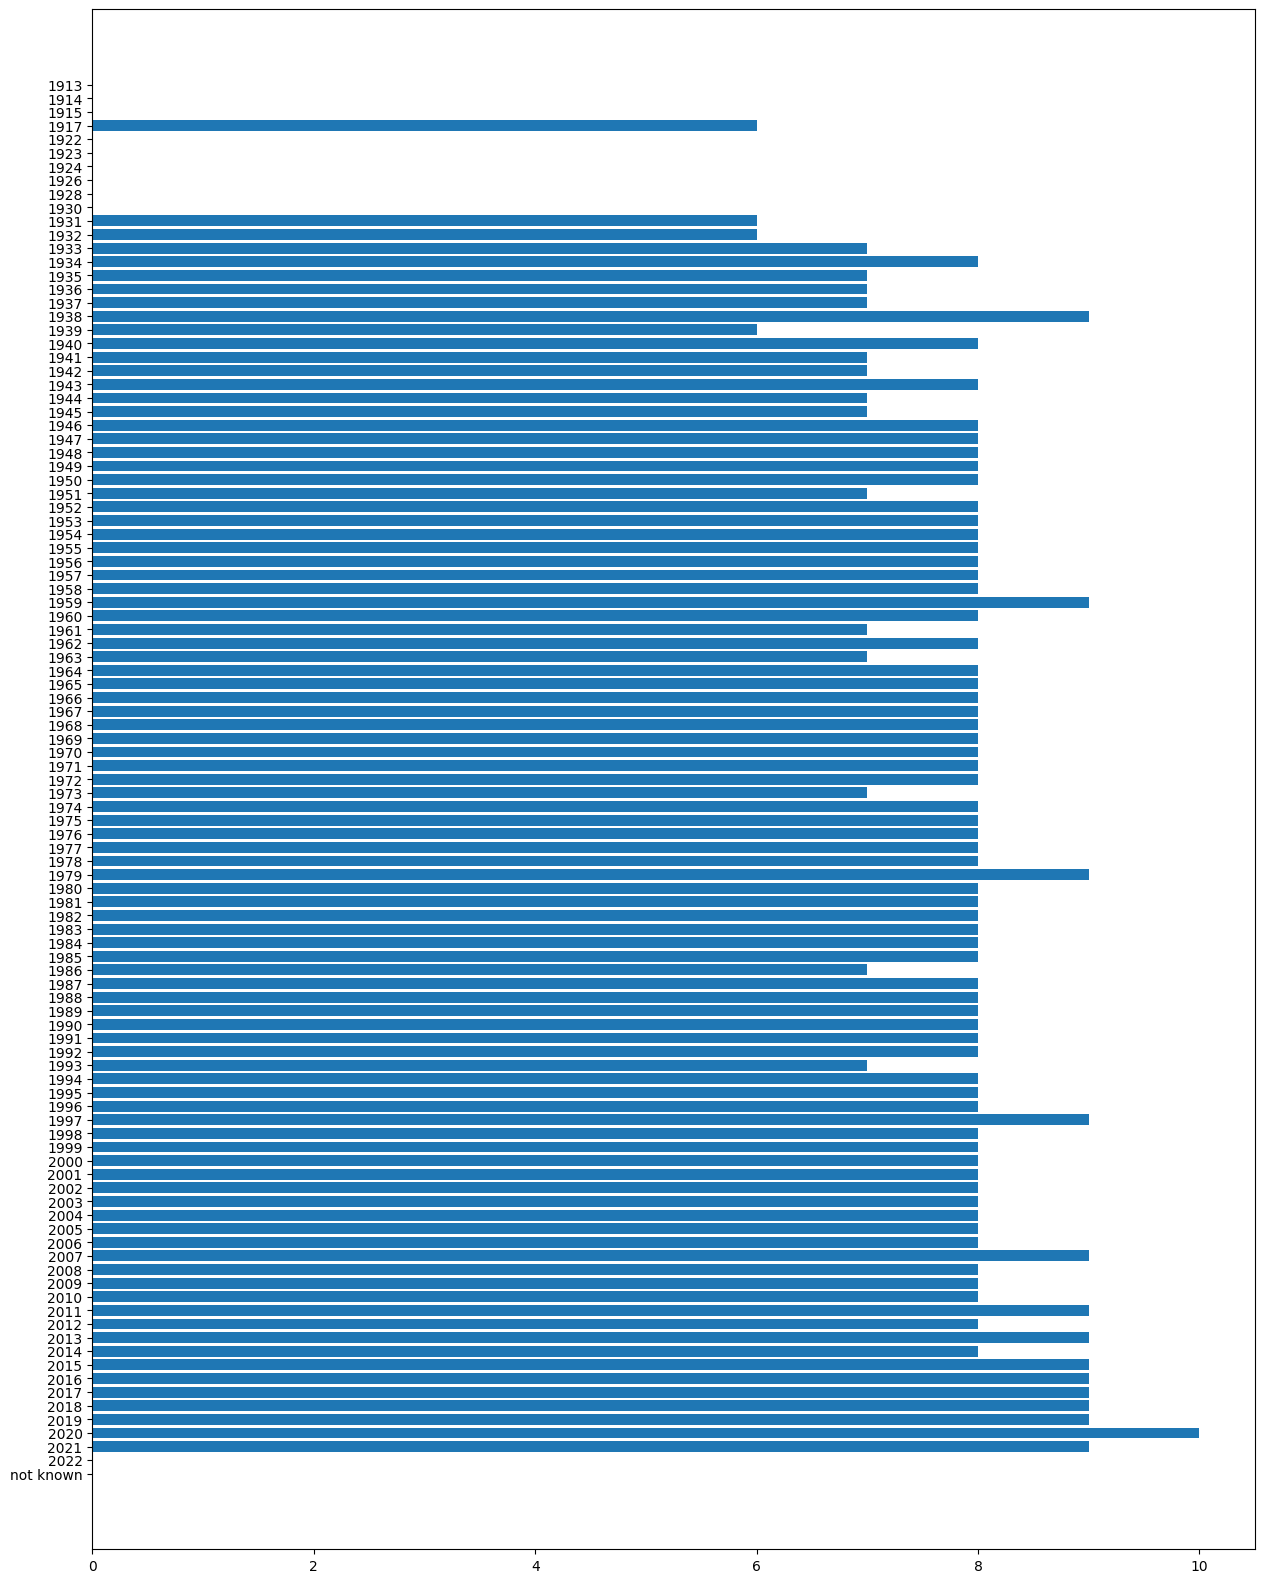

In [30]:
plt.figure(figsize=(15,20))
plt.barh(df['Year'],df['Rating'])
plt.show()